Kingdom:  Count: 506
----
Kingdom: Animalia Count: 92915
----
Kingdom: Archaea Count: 9
----
Kingdom: Bacteria Count: 2
----
Kingdom: Chromista Count: 326
----
Kingdom: Fungi Count: 546
----
Kingdom: Plantae Count: 108430
----
Kingdom: Protozoa Count: 59
----
----Unique Species Count----
Species: Abies bifolia Count: 1
----
Species: Abies lasiocarpa Count: 3663
----
Species: Abronia ammophila Count: 1
----
Species: Acanthis flammea Count: 20
----
Species: Acanthoscelides oregonensis Count: 1
----
Species: Acanthus flammea Count: 1
----
Species: Acari Count: 6
----
Species: Acarospora Count: 2
----
Species: Acarospora glaucocarpa Count: 3
----
Species: Acarospora oxytona Count: 1
----
Species: Acartophthalmus nigrinus Count: 1
----
Species: Acaulospora morrowiae Count: 1
----
Species: Accipiter cooperii Count: 59
----
Species: Accipiter gentilis Count: 54
----
Species: Accipiter striatus Count: 88
----
Species: Accipiter striatus velox Count: 2
----
Species: Acer Count: 1
----
Species: 

----
Species: Arnica chamissonis foliosa Count: 2
----
Species: Arnica cordifolia Count: 20
----
Species: Arnica fulgens Count: 1
----
Species: Arnica latifolia Count: 6
----
Species: Arnica latifolia gracilis Count: 1
----
Species: Arnica latifolia latifolia Count: 1
----
Species: Arnica longifolia Count: 3
----
Species: Arnica longifolia longifolia Count: 1
----
Species: Arnica mollis Count: 3
----
Species: Arnica parryi Count: 5
----
Species: Arnica parryi parryi Count: 1
----
Species: Arnica rydbergii Count: 2
----
Species: Arnica sororia Count: 3
----
Species: Artemisia absinthium Count: 1
----
Species: Artemisia arbuscula arbuscula Count: 1
----
Species: Artemisia arbuscula longiloba Count: 2
----
Species: Artemisia biennis biennis Count: 1
----
Species: Artemisia cana Count: 2
----
Species: Artemisia cana viscidula Count: 4
----
Species: Artemisia dracunculus Count: 1
----
Species: Artemisia frigida Count: 3
----
Species: Artemisia ludoviciana Count: 2
----
Species: Artemisia lu

----
Species: Brachycentrus Count: 4
----
Species: Brachycentrus americanus Count: 9
----
Species: Brachycentrus occidentalis Count: 1
----
Species: Brachytheciastrum Count: 5
----
Species: Brachythecium Count: 24
----
Species: Brachythecium albicans Count: 3
----
Species: Brachythecium collinum Count: 3
----
Species: Brachythecium erythrorrhizon Count: 2
----
Species: Brachythecium lamprochryseum solfatarense Count: 2
----
Species: Brachythecium rivulare Count: 1
----
Species: Brachythecium salebrosum Count: 1
----
Species: Brachythecium turgidum Count: 1
----
Species: Braconidae Count: 10
----
Species: Branta canadensis Count: 2550
----
Species: Branta hutchinsii Count: 5
----
Species: Brickellia grandiflora Count: 1
----
Species: Brillia Count: 2
----
Species: Bromopsis ciliata Count: 4
----
Species: Bromopsis vulgaris Count: 1
----
Species: Bromus anomalus Count: 1
----
Species: Bromus brizaeformis Count: 1
----
Species: Bromus carinatus Count: 16
----
Species: Bromus ciliatus Coun

Species: Carex limosa Count: 4
----
Species: Carex livida Count: 1
----
Species: Carex luzulina ablata Count: 2
----
Species: Carex macloviana Count: 1
----
Species: Carex microglochin Count: 1
----
Species: Carex microptera Count: 12
----
Species: Carex nebrascensis Count: 1
----
Species: Carex neurophora Count: 1
----
Species: Carex nigricans Count: 1
----
Species: Carex norvegica stevenii Count: 1
----
Species: Carex nova pelocarpa Count: 1
----
Species: Carex obtusata Count: 1
----
Species: Carex pachycarpa Count: 2
----
Species: Carex pachystachya Count: 2
----
Species: Carex parryana parryana Count: 1
----
Species: Carex paupercula Count: 1
----
Species: Carex paysonis Count: 1
----
Species: Carex pellita Count: 2
----
Species: Carex petasata Count: 2
----
Species: Carex phaeocephala Count: 1
----
Species: Carex platylepis Count: 1
----
Species: Carex praeceptorium Count: 1
----
Species: Carex praegracilis Count: 1
----
Species: Carex praticola Count: 2
----
Species: Carex pyrena

Species: Cistothorus palustris Count: 19
----
Species: Cistothorus platensis Count: 1
----
Species: Claassenia sabulosa Count: 57
----
Species: Cladina Count: 3
----
Species: Cladina mitis Count: 2
----
Species: Cladina portentosa Count: 2
----
Species: Cladonia borealis Count: 1
----
Species: Cladonia cariosa Count: 3
----
Species: Cladonia carneola Count: 2
----
Species: Cladonia cenotea Count: 5
----
Species: Cladonia chlorophaea Count: 4
----
Species: Cladonia cornuta Count: 1
----
Species: Cladonia deformis Count: 1
----
Species: Cladonia ecmocyna Count: 4
----
Species: Cladonia fimbriata Count: 6
----
Species: Cladonia gonecha Count: 1
----
Species: Cladonia macrophyllodes Count: 1
----
Species: Cladonia subcariosa Count: 2
----
Species: Cladonia sulphurina Count: 2
----
Species: Cladopodiella fluitans Count: 1
----
Species: Cladotanytarsus Count: 2
----
Species: Clangula hyemalis Count: 2
----
Species: Claytonia lanceolata Count: 3
----
Species: Claytonia megarhiza megarhiza Cou

Species: Descurainia incana Count: 2
----
Species: Descurainia incana incana Count: 1
----
Species: Descurainia incana viscosa Count: 1
----
Species: Descurainia pinnata brachycarpa Count: 1
----
Species: Descurainia pinnata filipes Count: 1
----
Species: Descurainia pinnata intermedia Count: 1
----
Species: Descurainia pinnata nelsonii Count: 1
----
Species: Descurainia richardsonii Count: 1
----
Species: Descurainia sophia Count: 1
----
Species: Deuterophlebia nielsoni Count: 3
----
Species: Deuterosminthurus Count: 1
----
Species: Diacodexis metsiacus Count: 1
----
Species: Diadasia australis Count: 2
----
Species: Diadasia diminuta Count: 10
----
Species: Diadasia rinconis Count: 1
----
Species: Diadesmis contenta Count: 1
----
Species: Diadesmis gallica Count: 1
----
Species: Diamesa Count: 6
----
Species: Dianthidium Count: 2
----
Species: Dianthidium heterulkei Count: 3
----
Species: Dianthidium pudicum Count: 8
----
Species: Dianthidium subparvum Count: 16
----
Species: Dianthu

Species: Erebia callias Count: 3
----
Species: Erebia epipsodea Count: 6
----
Species: Erebia epipsodea epipsodea Count: 1
----
Species: Erebia magdalena Count: 1
----
Species: Erebia pawlowskii Count: 1
----
Species: Erebia theano ethela Count: 1
----
Species: Eremogone congesta congesta Count: 1
----
Species: Eremogone congesta lithophila Count: 1
----
Species: Eremophila alpestris Count: 95
----
Species: Erethemis collocata Count: 1
----
Species: Erethizon dorsatum Count: 1
----
Species: Erethizon dorsatus Count: 2
----
Species: Erethizon dorsatus epixanthus Count: 1
----
Species: Ericaceae Count: 117
----
Species: Ericameria discoidea linearis Count: 1
----
Species: Ericameria nauseosa nauseosa Count: 1
----
Species: Ericameria nauseosa oreophila Count: 1
----
Species: Ericameria suffruticosa Count: 1
----
Species: Erigeron acris kamtschaticus Count: 1
----
Species: Erigeron caespitosus Count: 1
----
Species: Erigeron compositus discoideus Count: 1
----
Species: Erigeron corymbosus

Species: Gentianopsis thermalis Count: 5
----
Species: Geothlypis tolmiei Count: 148
----
Species: Geothlypis tolomiei Count: 1
----
Species: Geothlypis trichas Count: 161
----
Species: Geothlypis trichas campicola Count: 1
----
Species: Geothlypis trichas occidentalis Count: 3
----
Species: Geranium bicknellii Count: 2
----
Species: Geranium richardsonii Count: 15
----
Species: Geranium viscosissimum Count: 35
----
Species: Geranium viscosissimum nervosum Count: 1
----
Species: Geranium viscosissimum viscosissimum Count: 1
----
Species: Gerris argenticollis Count: 1
----
Species: Geum aleppicum Count: 6
----
Species: Geum macrophyllum Count: 17
----
Species: Geum macrophyllum perincisum Count: 2
----
Species: Geum rivale Count: 3
----
Species: Geum rossii turbinatum Count: 1
----
Species: Geum triflorum Count: 9
----
Species: Gila atraria Count: 3
----
Species: Gilia linearis Count: 1
----
Species: Glaucidium gnoma Count: 19
----
Species: Glaucomys sabrinus Count: 2
----
Species: Glau

Species: Hylaeus rudbeckiae Count: 1
----
Species: Hylaeus schwarzii Count: 1
----
Species: Hylaeus wootoni Count: 13
----
Species: Hyles gallii Count: 2
----
Species: Hyles lineata Count: 1
----
Species: Hylocomium splendens Count: 1
----
Species: Hymenoloma Count: 8
----
Species: Hymenoloma crispulum Count: 1
----
Species: Hymenoptera Count: 16
----
Species: Hymenostylium recurvirostre Count: 1
----
Species: Hymenostylium recurvirostrum Count: 1
----
Species: Hyopsodus loomisi Count: 1
----
Species: Hyoscyamus niger Count: 1
----
Species: Hyperbaena diforma Count: 1
----
Species: Hypercompe permaculata Count: 3
----
Species: Hypericum formosum scouleri Count: 1
----
Species: Hypericum perforatum Count: 3
----
Species: Hypnum Count: 1
----
Species: Hypnum revolutum Count: 3
----
Species: Hypocenomyce xanthococca Count: 4
----
Species: Hypogymnia Count: 1
----
Species: Hypogymnia austerodes Count: 2
----
Species: Hyponysson bicolor Count: 1
----
Species: Hypopitys monotropa Count: 2
--

Species: Lepidostoma pluviale Count: 1
----
Species: Lepidostoma roafi Count: 1
----
Species: Lepidozia reptans Count: 2
----
Species: Lepisosteus Count: 1
----
Species: Lepraria alpina Count: 1
----
Species: Lepraria lobificans Count: 1
----
Species: Leptarctia californiae Count: 1
----
Species: Lepthyphantes chamberlini Count: 1
----
Species: Leptobryum pyriforme Count: 1
----
Species: Leptodactylon pungens Count: 2
----
Species: Leptodora Count: 1
----
Species: Leptogium Count: 1
----
Species: Leptogium saturninum Count: 2
----
Species: Leptosiphon septentrionalis Count: 1
----
Species: Leptothorax muscorum Count: 2
----
Species: Lepus americanus Count: 6
----
Species: Lepus americanus bairdii Count: 4
----
Species: Lepus townsendii Count: 1
----
Species: Lepus townsendii campanius Count: 1
----
Species: Lesquerella alpina alpina Count: 1
----
Species: Lestes congener Count: 1
----
Species: Lestes disjunctus Count: 2
----
Species: Lestes dryas Count: 2
----
Species: Letharia Count: 

Species: Megachile subnigra Count: 1
----
Species: Megachile wheeleri Count: 5
----
Species: Megalomus moestus Count: 1
----
Species: Megarcys Count: 4
----
Species: Megascops kennicottii Count: 2
----
Species: Megaspora verrucosa Count: 1
----
Species: Melanelia Count: 1
----
Species: Melanelia tominii Count: 2
----
Species: Melanerpes erythrocephalus Count: 2
----
Species: Melanerpes lewis Count: 13
----
Species: Melanitta fusca Count: 1
----
Species: Melanitta perspicillata Count: 1
----
Species: Melanoides tuberculata Count: 1
----
Species: Melanoplus bivittatus Count: 1
----
Species: Melanoplus borealis Count: 1
----
Species: Meleagris gallopavo Count: 35
----
Species: Melecta pacifica Count: 2
----
Species: Melica bulbosa Count: 4
----
Species: Melica spectabilis Count: 4
----
Species: Melica subulata Count: 1
----
Species: Melilotus albus Count: 2
----
Species: Melilotus officinalis Count: 7
----
Species: Meliosma Count: 4
----
Species: Melissodes Count: 11
----
Species: Melisso

----
Species: Nitzschia communis Count: 2
----
Species: Nitzschia dissipata Count: 4
----
Species: Nitzschia fonticola Count: 3
----
Species: Nitzschia frustulum Count: 5
----
Species: Nitzschia gracilis Count: 1
----
Species: Nitzschia heufleriana Count: 2
----
Species: Nitzschia inconspicua Count: 8
----
Species: Nitzschia linearis Count: 5
----
Species: Nitzschia microcephala Count: 3
----
Species: Nitzschia palea Count: 5
----
Species: Nitzschia paleacea Count: 2
----
Species: Nitzschia perminuta Count: 2
----
Species: Nitzschia recta Count: 1
----
Species: Nitzschia sigmoidea Count: 2
----
Species: Nitzschia vermicularis Count: 1
----
Species: Nixonella Count: 1
----
Species: Noccaea montana Count: 1
----
Species: Noccaea parviflora Count: 1
----
Species: Nomada Count: 3
----
Species: Nomia melanderi Count: 3
----
Species: Nothocalais nigrescens Count: 1
----
Species: Nothocalais troximoides Count: 1
----
Species: Notholca Count: 2
----
Species: Notonecta kirbyi Count: 5
----
Spec

----
Species: Pardosa coloradensis Count: 1
----
Species: Pardosa concinna Count: 1
----
Species: Pardosa groenlandica Count: 1
----
Species: Pardosa moesta Count: 1
----
Species: Pardosa tetonensis Count: 3
----
Species: Pardosa xerampelina Count: 2
----
Species: Parietaria pensylvanica Count: 1
----
Species: Parkesia noveboracensis Count: 2
----
Species: Parlibellus protracta Count: 1
----
Species: Parmelia elegantula Count: 2
----
Species: Parmelia sulcata Count: 2
----
Species: Parmeliopsis ambigua Count: 6
----
Species: Parmeliopsis hyperopta Count: 3
----
Species: Parnassia fimbriata Count: 1
----
Species: Parnassia kotzebuei Count: 1
----
Species: Parnassia palustris montanensis Count: 1
----
Species: Parnassia parviflora Count: 1
----
Species: Parnassius clodius Count: 4
----
Species: Parnassius phoebus Count: 3
----
Species: Parnassius smintheus Count: 9
----
Species: Paronychia sessiliflora Count: 1
----
Species: Parus gambeli gambeli Count: 1
----
Species: Passer domesticus 

Species: Plebejus acmon Count: 2
----
Species: Plebejus acmon lutzi Count: 1
----
Species: Plebejus glandon Count: 1
----
Species: Plebejus icarioides Count: 25
----
Species: Plebejus idas Count: 1
----
Species: Plebejus lupini Count: 2
----
Species: Plebejus melissa Count: 4
----
Species: Plebejus saepiolas hilda Count: 1
----
Species: Plebejus saepiolas saepiolus Count: 1
----
Species: Plebejus saepiolus Count: 2
----
Species: Plebejus shasta Count: 3
----
Species: Plecoptera Count: 9
----
Species: Plectrophenax nivalis Count: 5
----
Species: Plegadis chihi Count: 32
----
Species: Pleopsidium flavum Count: 2
----
Species: Pleuroclymenia americana Count: 2
----
Species: Pleurozium schreberi Count: 1
----
Species: Plumiperla diversa Count: 1
----
Species: Pluvialis squatarola Count: 2
----
Species: Poa alpina Count: 4
----
Species: Poa annua Count: 1
----
Species: Poa arctica grayana Count: 1
----
Species: Poa arida Count: 1
----
Species: Poa bulbosa Count: 1
----
Species: Poa canbyi C

Species: Pseudodiamesa Count: 1
----
Species: Pseudognaphalium macounii Count: 1
----
Species: Pseudognaphalium microcephalum thermale Count: 1
----
Species: Pseudognaphalium stramineum Count: 2
----
Species: Pseudoleskea Count: 11
----
Species: Pseudomasaris zonalis Count: 1
----
Species: Pseudopanurgus didirupa Count: 1
----
Species: Pseudoroegneria spicata Count: 10
----
Species: Pseudotsuga menziesii Count: 780
----
Species: Pseudotsuga menziesii glauca Count: 3
----
Species: Psiloscops flammeolus Count: 1
----
Species: Psora Count: 1
----
Species: Psora montana Count: 3
----
Species: Psora tuckermanii Count: 1
----
Species: Psoroma hypnorum Count: 9
----
Species: Psoroma tenue Count: 1
----
Species: Psychodidae Count: 4
----
Species: Psychomyia Count: 1
----
Species: Psychomyia flavida Count: 2
----
Species: Pteridium aquilinum Count: 1
----
Species: Pteridium aquilinum pubescens Count: 1
----
Species: Pterocheilus morrisoni Count: 1
----
Species: Pteronarcella badia Count: 1
----

Species: Salix exigua Count: 1
----
Species: Salix farriae Count: 1
----
Species: Salix geyeriana Count: 10
----
Species: Salix glauca Count: 1
----
Species: Salix glauca villosa Count: 1
----
Species: Salix lasiandra caudata Count: 1
----
Species: Salix lemmonii Count: 1
----
Species: Salix luteosericea Count: 2
----
Species: Salix melanopsis Count: 1
----
Species: Salix planifolia Count: 1
----
Species: Salix pseudomonticola Count: 1
----
Species: Salix pseudomyrsinites Count: 2
----
Species: Salix reticulata nana Count: 1
----
Species: Salix rigida Count: 1
----
Species: Salix rotundifolia dodgeana Count: 1
----
Species: Salix scouleriana Count: 1
----
Species: Salix tweedyi Count: 2
----
Species: Salix wolfii Count: 1
----
Species: Salix wolfii idahoensis Count: 1
----
Species: Salix wolfii wolfii Count: 1
----
Species: Salmo Count: 1
----
Species: Salmo clarkii lewisi Count: 2
----
Species: Salmo trutta Count: 16
----
Species: Salpinctes obsoletus Count: 198
----
Species: Salsola 

Species: Somatochlora semicircularis Count: 1
----
Species: Sonchus arvensis Count: 1
----
Species: Sonchus asper Count: 1
----
Species: Sonchus uliginosus Count: 1
----
Species: Sophora Count: 2
----
Species: Sorbus scopulina scopulina Count: 1
----
Species: Sorex cinereus Count: 5
----
Species: Sorex cinereus cinereus Count: 16
----
Species: Sorex monticolus Count: 1
----
Species: Sorex monticolus obscurus Count: 25
----
Species: Sorex nanus Count: 1
----
Species: Sorex palustris Count: 1
----
Species: Sorex palustris navigator Count: 11
----
Species: Sorex preblei Count: 1
----
Species: Sorex vagrans Count: 14
----
Species: Sorex vagrans vagrans Count: 1
----
Species: Sparganium angustifolium Count: 1
----
Species: Sparganium emersum Count: 1
----
Species: Sparganium natans Count: 1
----
Species: Spartina gracilis Count: 1
----
Species: Specid Count: 2
----
Species: Spergularia rubra Count: 1
----
Species: Spermophilus armatus Count: 13
----
Species: Spermophilus lateralis Count: 1


Species: Thalictrum alpinum Count: 1
----
Species: Thalictrum occidentale Count: 23
----
Species: Thalictrum sparsiflorum saximontanum Count: 1
----
Species: Thalictrum venulosum Count: 2
----
Species: Thamnolia subuliformis Count: 3
----
Species: Thamnolia vermicularis subuliformis Count: 2
----
Species: Thamnophis elegans Count: 9
----
Species: Thamnophis elegans vagrans Count: 6
----
Species: Thamnophis ordinoides Count: 4
----
Species: Thamnophis sirtalis fitchi Count: 1
----
Species: Thelypodium integrifolium Count: 1
----
Species: Thelypodium paniculatum Count: 1
----
Species: Thelypodium sagittatum Count: 1
----
Species: Thermoanaerobacterium xylanolyticum Count: 1
----
Species: Thermodesulfobacterium Count: 1
----
Species: Thermopsis montana Count: 1
----
Species: Thlaspi arvense Count: 6
----
Species: Thomomys talpoides Count: 10
----
Species: Thomomys talpoides tenellus Count: 43
----
Species: Thorybes pylades Count: 2
----
Species: Thryomanes bewickii Count: 1
----
Species: 

Species: Xanthoria fulva Count: 1
----
Species: Xanthoria montana Count: 2
----
Species: Xanthoria sorediata Count: 3
----
Species: Xema sabini Count: 3
----
Species: Xerophyllum tenax Count: 1
----
Species: Xylographa vitiligo Count: 4
----
Species: Xysticus benefactor Count: 1
----
Species: Xysticus emertoni Count: 1
----
Species: Yoraperla brevis Count: 4
----
Species: Zannichellia palustris Count: 1
----
Species: Zapada Count: 8
----
Species: Zapus Count: 2
----
Species: Zapus hudsonius Count: 2
----
Species: Zapus princeps Count: 118
----
Species: Zelotes puritanus Count: 1
----
Species: Zelotes subterraneus Count: 2
----
Species: Zenaida macroura Count: 190
----
Species: Zigadenus elegans Count: 3
----
Species: Zigadenus venenosus Count: 1
----
Species: Zigadenus venenosus gramineus Count: 1
----
Species: Zizia aptera Count: 2
----
Species: Zonotrichia albicollis Count: 8
----
Species: Zonotrichia leucophrys Count: 1098
----
Species: Zonotrichia leucophrys leucophrys Count: 3
---

<IPython.core.display.Javascript object>


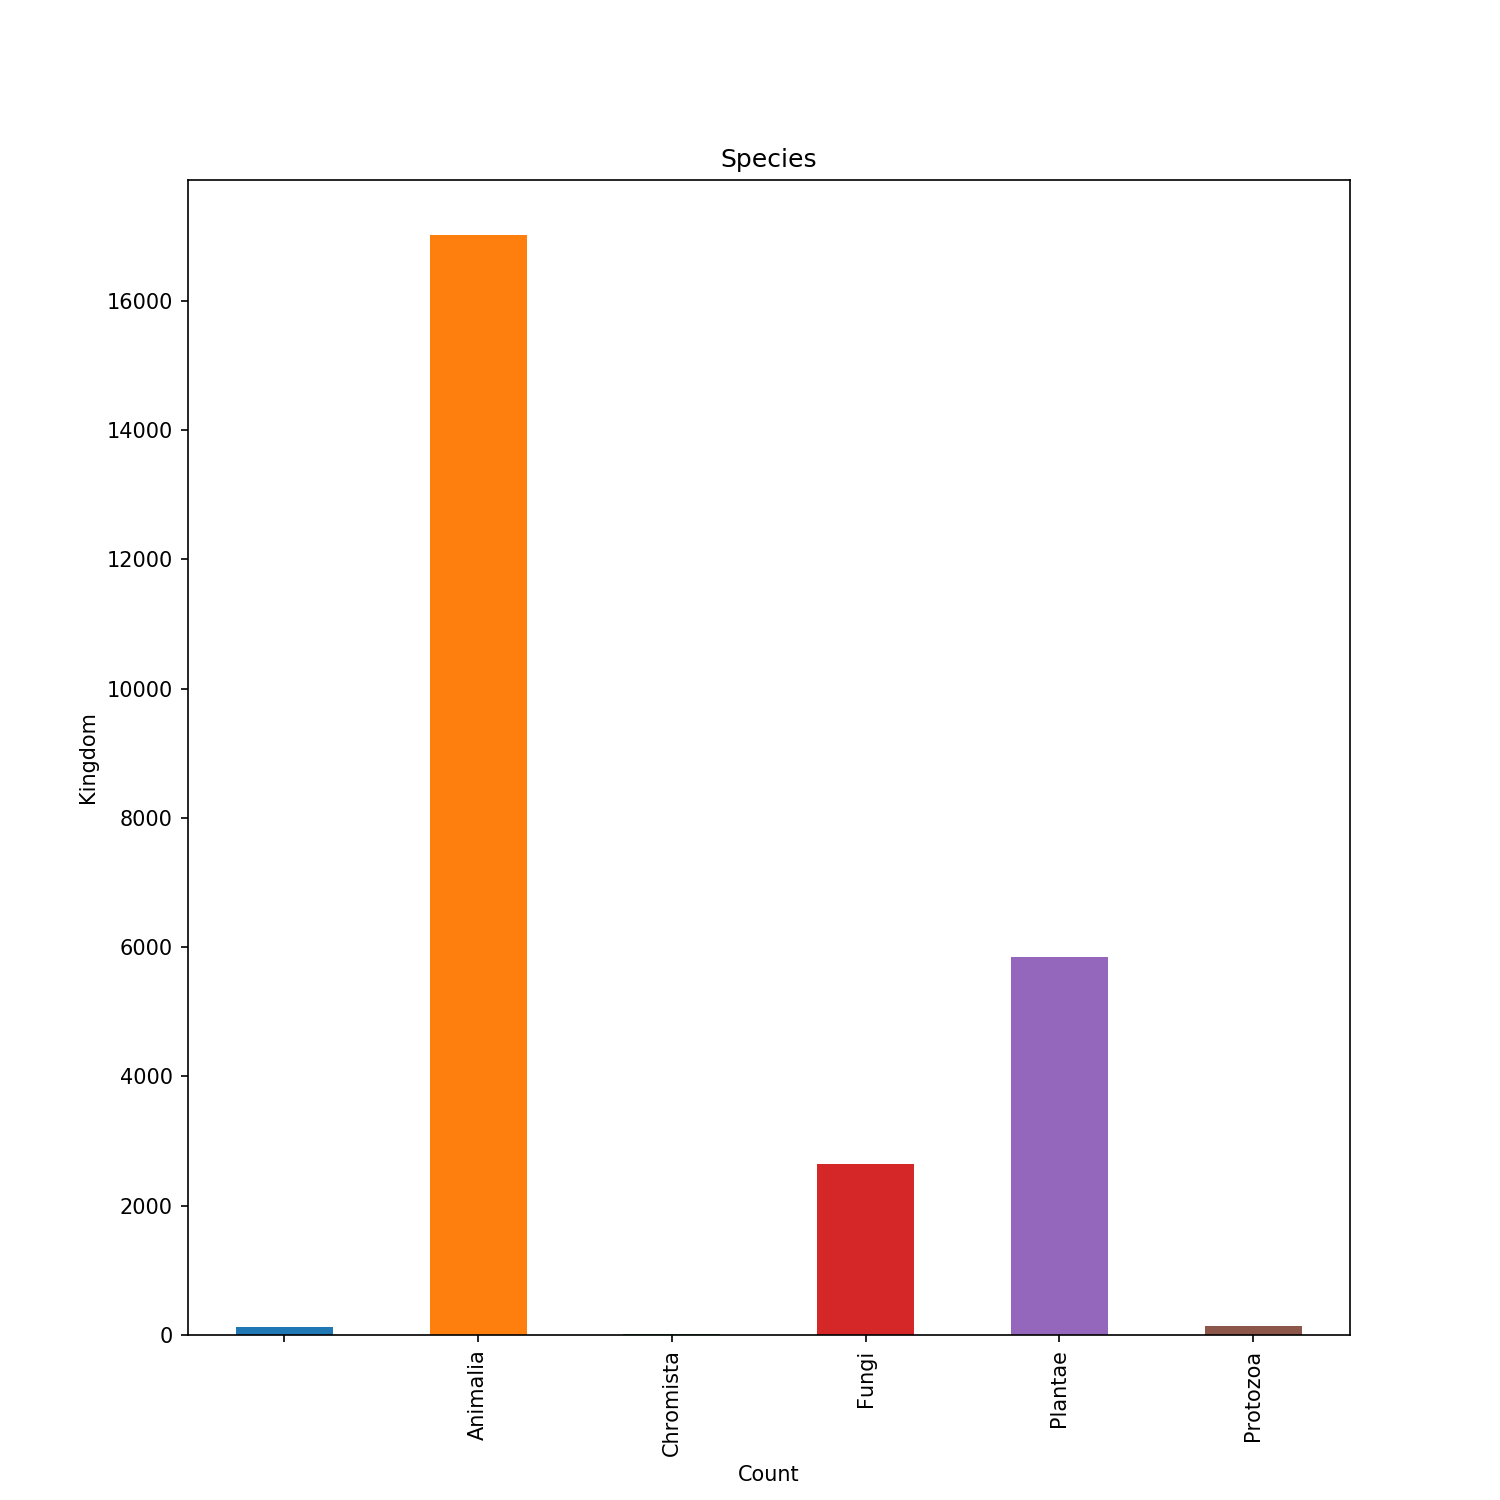

In [16]:
import urllib.request
import urllib.parse
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *
%matplotlib notebook
import matplotlib.pyplot as plt
import csv



#plt.plot([0, 1, 2, 2]);
 grsm1 = 'https://bison.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[35.38%20TO%2035.87]%20AND%20decimalLongitude:[-84.058%20TO%20-82.96]&wt=json&rows=50&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=kingdom,scientificName&&indent=true'
grsm2 = 'https://bison.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[35.38%20TO%2035.87]%20AND%20decimalLongitude:[-84.058%20TO%20-82.96]&wt=json&rows=50&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=scientificName&&indent=true'

yellowstone1 = 'https://bison.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[44.1325%20TO%2045.1085]%20AND%20decimalLongitude:[-111.1568%20TO%20-109.8242]&wt=json&rows=50&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=kingdom,scientificName&&indent=true'
yellowstone2 = 'https://bison.usgs.gov/solr/occurrences/select/?q=decimalLatitude:[44.1325%20TO%2045.1085]%20AND%20decimalLongitude:[-111.1568%20TO%20-109.8242]&wt=json&rows=50&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=scientificName&&indent=true'

url = 'https://data.usgs.gov/solr/occurrences/select/?q={!bbox%20pt=66.62313748,-159.341958%20sfield=geo%20d=1}&rows=100&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=kingdom,scientificName&&indent=true'
f = urllib.request.urlopen(yellowstone1)
jsonResults=json.loads(f.read().decode('utf-8'))

facets=jsonResults['facet_counts']['facet_pivot']['kingdom,scientificName']
#facets=jsonResults['facet_counts']['facet_pivot']['scientificName']
a=0
b=[]
c=[]
for index,item in enumerate(facets):
    a+=1
    print("Kingdom:", item["value"], "Count:",item["count"])
    print("----")
    if item["value"]!="":
        b.append(item["value"])
        c.append(item["count"])
    else:
        b.append(" ")
        c.append(item["count"])
    

f = urllib.request.urlopen(yellowstone2)
jsonResults=json.loads(f.read().decode('utf-8'))
facets=jsonResults['facet_counts']['facet_pivot']['scientificName']
#facets = list(set(facets))
print("----Unique Species Count----")
for index,item in enumerate(facets):
    print("Species:", item["value"], "Count:",item["count"])
    print("----")
    
print(index)
if index==5:
    s = pd.Series([c[0],c[1],c[2],c[3],c[4],c[5]], index=[b[0],b[1],b[2],b[3],b[4],b[5]])
if index==4:
    s = pd.Series([c[0],c[1],c[2],c[3],c[4]], index=[b[0],b[1],b[2],b[3],b[4]])
if index==3:
    s = pd.Series([c[0],c[1],c[2],c[3]], index=[b[0],b[1],b[2],b[3]])
if index==2:
    s = pd.Series([c[0],c[1],c[2]], index=[b[0],b[1],b[2]])
if index==1:
    s = pd.Series([c[0],c[1]], index=[b[0],b[1]])
if index==0:
    s = pd.Series([c[0]], index=[b[0]])
    
s.plot.bar(figsize=(10,10))
plt.xlabel('Count')
plt.ylabel('Kingdom')
plt.title("Species");